In [1]:
import matplotlib.pyplot as plt
import numpy as np

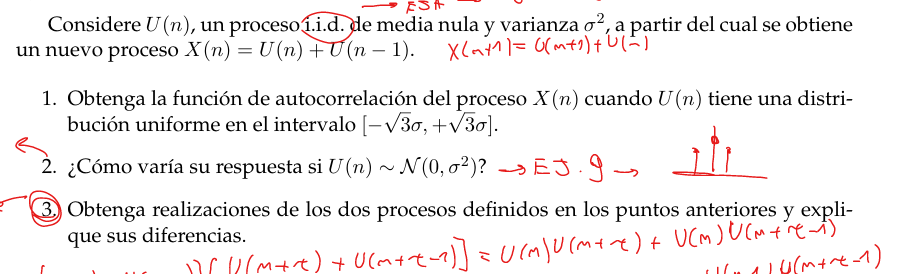

Voy a generar realizaciones de la uniforme y la normal. 
Las grafico para ver la diferencia
Las paso por el sistema y grafico para ver la diferencia
Estimo las autocorrelaciones de los procesos de salida

### Uniforme

1.7320508075688772


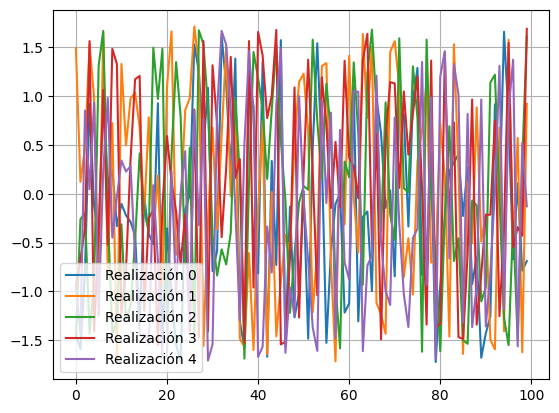

In [66]:
N = 100 #largo de la ralizacion
R = 1000 #cantiad de realizaciones q manejo
print(np.sqrt(3))
sigma = 1
U_input = np.random.uniform(low = -np.sqrt(3)*sigma, high = np.sqrt(3)*sigma, size = (R, N))


for i in range(5):
    plt.plot(U_input[i], label = f'Realización {i}')

#plt.ylim(0)

plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

### Entra al sistema

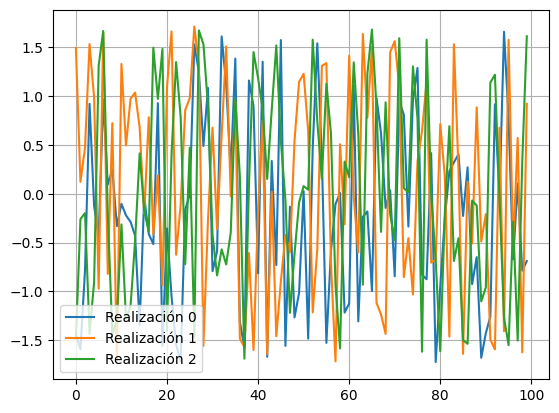

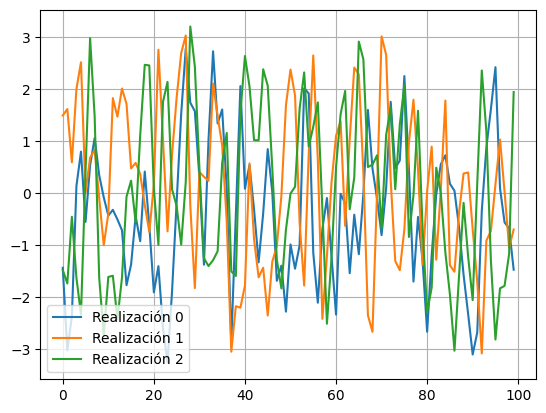

In [67]:
U_output = np.zeros(U_input.shape)

for i in range(R):
    U_output[i, 0] = U_input[i, 0]
    for j in range(1, N):
        U_output[i, j] = U_input[i, j] + U_input[i, j - 1]

for i in range(3):
    plt.plot(U_input[i], label = f'Realización {i}')

#plt.ylim(0)

plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()


for i in range(3):
    plt.plot(U_output[i], label = f'Realización {i}')

#plt.ylim(0)

plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

### Autocorrelación de la salida

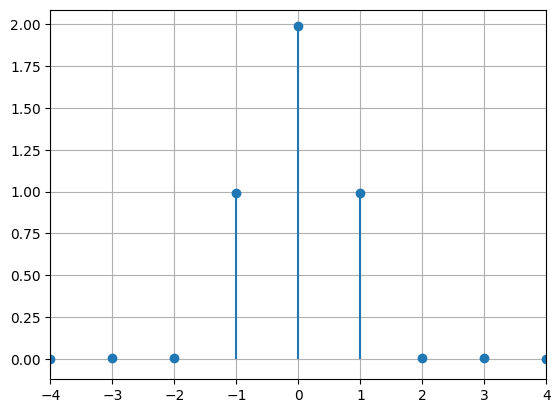

In [68]:
R_out_uniforme = np.zeros((R, 2 * N - 1))

for i in range(R):
    R_out_uniforme[i] = (1/N) * np.correlate(U_output[i], U_output[i], mode = 'full')

R_out_uniforme = np.mean(R_out_uniforme, axis = 0)

tau = np.arange(start = -(N - 1), stop = N)

plt.stem(tau, R_out_uniforme, basefmt='none')

plt.xlim(-4, 4)

plt.grid(True)
plt.show()


Si $X(n)$ es la salida



$R_X(0) = (1^2 + 1^2) \sigma^2 = 2 \sigma^2 = 2 (\sigma = 1) $

$R_X(1) = 1^2 \sigma^2 = 1 $

Todo en orden

### Normal



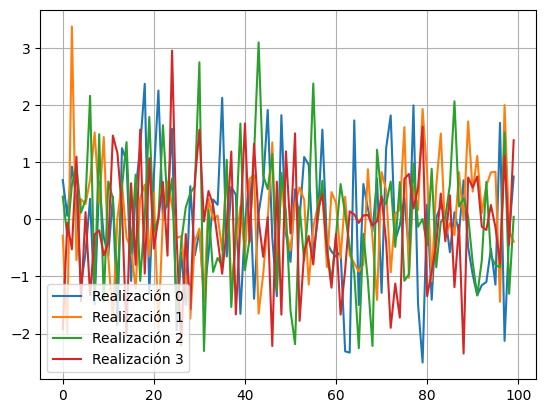

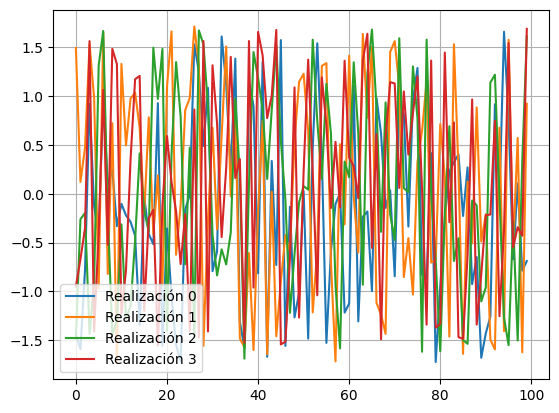

In [69]:
N_input = (np.sqrt(sigma))* np.random.randn(R, N)

for i in range(4):
    plt.plot(N_input[i], label = f'Realización {i}')

#plt.ylim(0)

plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

for i in range(4):
    plt.plot(U_input[i], label = f'Realización {i}')

#plt.ylim(0)

plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

¿Cuál es la diferencia? Tal vez en frecuencia se distingan mejor

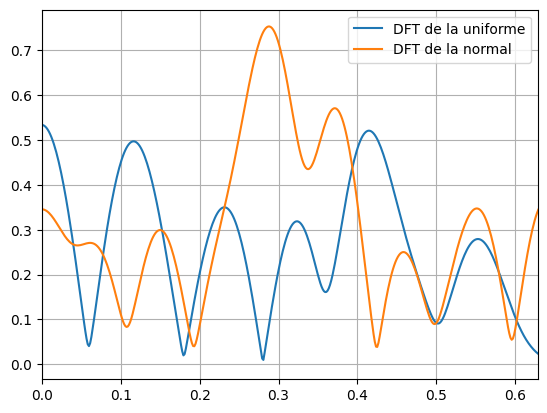

In [71]:
n = 4*1024
U_input_f = np.fft.fft(U_input, n = n)
U_input_f = np.abs(np.mean(U_input_f, axis = 0))

N_input_f = np.fft.fft(N_input, n = n)
N_input_f = np.abs(np.mean(N_input_f, axis = 0))

w = np.linspace(start = 0, stop = 2*np.pi, num = n)

plt.plot(w, U_input_f, label = 'DFT de la uniforme')
plt.plot(w, N_input_f, label = 'DFT de la normal')

plt.xlim(0, np.pi/5)

plt.legend()
plt.grid(True)
plt.show()

Malísimo

¿Cuál es la diferencia entre un ruido blanco gaussiano y un ruido blanco uniforme, además de la distribución?

### La normal entra al sistema

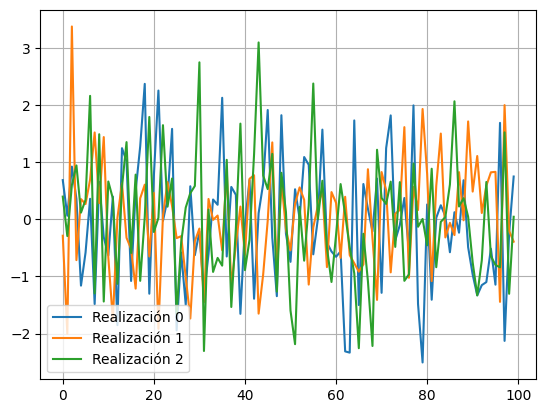

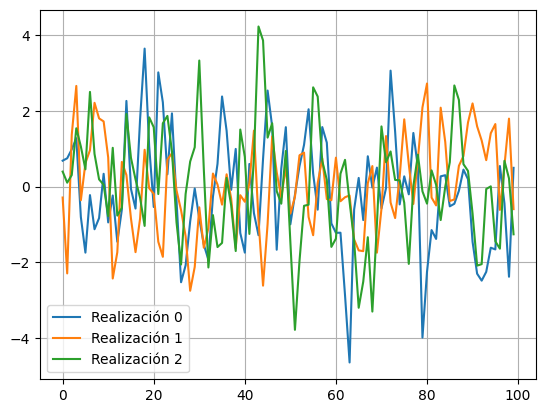

In [72]:
N_output = np.zeros(U_input.shape)

for i in range(R):
    N_output[i, 0] = N_input[i, 0]
    for j in range(1, N):
        N_output[i, j] = N_input[i, j] + N_input[i, j - 1]

for i in range(3):
    plt.plot(N_input[i], label = f'Realización {i}')

#plt.ylim(0)

plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()


for i in range(3):
    plt.plot(N_output[i], label = f'Realización {i}')

#plt.ylim(0)

plt.legend(loc = 'lower left')
plt.grid(True)
plt.show()

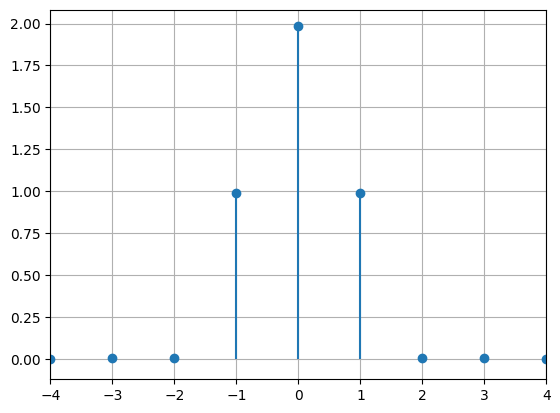

In [73]:
R_out_normal = np.zeros((R, 2 * N - 1))

for i in range(R):
    R_out_normal[i] = (1/N) * np.correlate(N_output[i], N_output[i], mode = 'full')

R_out_normal = np.mean(R_out_normal, axis = 0)

tau = np.arange(start = -(N - 1), stop = N)

plt.stem(tau, R_out_normal, basefmt='none')

plt.xlim(-4, 4)

plt.grid(True)
plt.show()

# Malardo esto. 

Además, yo soy un gil. La idea hubiera sido implementar esto con las fórmulas del ej 6